#Explore The Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ath = 'trainset.txt'
column_names = ['CLASS', 'TITLE', 'DATE', 'BODY']
news = pd.read_csv(ath, sep='\t', names=column_names)
news.head()

,CLASS,TITLE,DATE,BODY
0,1,JAPAN FIRM PLANS TO SELL U.S. FARMLAND TO JAP...,"MORIOKA, Japan, March 12 -",A Japanese real estate company said it will ...
1,-1,NORTH BH SETS ONE-FOR-FIVE OFFER FOR NORGOLD ...,"MELBOURNE, March 12 -",North Broken Hill Holdings Ltd & lt;NBHA.ME ...
2,-1,OUTOKUMPU IN COPPER DEAL WITH IBERICA DEL COBRE,"HELSINKI, June 26 -",Finland's state-owned mining company Outokum...
3,1,ROTTERDAM GRAIN HANDLER SAYS PORT BALANCE ROSE,"ROTTERDAM, April 13 -","Graan Elevator Mij, GEM, said its balance in..."
4,1,U.S. SENATE PANEL VOTES TO LIMIT COUNTY LOAN ...,(NO DATE),(NO TEXT)


So We Can Find Their Some Values are Not Available(NO DATE , NO TEXT) Let,s Check How Many Values Have Like That

In [ ]:
no_date_count = (news['DATE'] == '(NO DATE)').sum()
no_text_count = (news['BODY'] == '(NO TEXT)').sum()

print(f'Number of occurrences of "(NO DATE)" in the DATE column: {no_date_count}')
print(f'Number of occurrences of "(NO TEXT)" in the BODY column: {no_text_count}')


Number of occurrences of "(NO DATE)" in the DATE column: 12
Number of occurrences of "(NO TEXT)" in the BODY column: 12


Lets View That Whole Datas

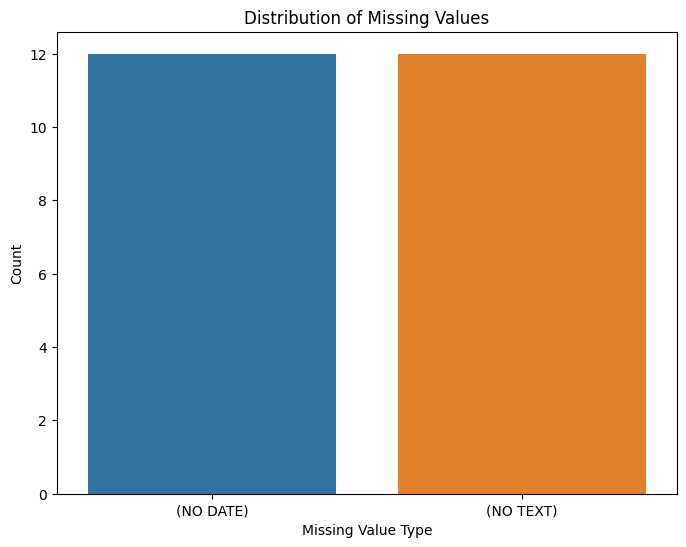

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['(NO DATE)', '(NO TEXT)'], y=[no_date_count, no_text_count])
plt.title('Distribution of Missing Values')
plt.xlabel('Missing Value Type')
plt.ylabel('Count')
plt.show()

In [ ]:
filtered_rows = news[(news['DATE'] == '(NO DATE)') | (news['BODY'] == '(NO TEXT)')]

filtered_table = filtered_rows[['CLASS', 'TITLE', 'DATE', 'BODY']]
filtered_table


,CLASS,TITLE,DATE,BODY
4,1,U.S. SENATE PANEL VOTES TO LIMIT COUNTY LOAN ...,(NO DATE),(NO TEXT)
28,-1,MINPECO LIFTS FORCE MAJEURE ON ZINC INGOT SH...,(NO DATE),(NO TEXT)
40,1,"EC AWARDS 123,000 TONNES BARLEY EXPORT LICEN...",(NO DATE),(NO TEXT)
59,1,FIRS 87/88 EC BEET SUGAR ESTIMATE UNCHANGED 1...,(NO DATE),(NO TEXT)
82,1,"UK INTERVENTION BD SAYS EC SOLD 60,500 TONNES...",(NO DATE),(NO TEXT)
93,1,USDA ESTIMATES 1986/87 ORANGE JUICE YIELD AT...,(NO DATE),(NO TEXT)
115,-1,COMEX RAISING MARGINS FOR GOLD AND COPPER FU...,(NO DATE),(NO TEXT)
116,1,"U.S. EXPORTERS REPORT 455,000 TONNES OF WHEA...",(NO DATE),(NO TEXT)
119,1,"U.S. EXPORTERS REPORT 200,000 TONNES WHEAT S...",(NO DATE),(NO TEXT)
133,1,"ICCO buffer stock manager to buy 5,000 tonnes...",(NO DATE),(NO TEXT)


So We Can Assume That Tittle Also Impact The Class First We Remove That (NO DATA),(NO TEXT) values and Choose Body as X and Class as y

#Preprocess the Data

In [ ]:
news_clean = news[(news['DATE'] != '(NO DATE)') & (news['BODY'] != '(NO TEXT)')]
news_clean.head()


,CLASS,TITLE,DATE,BODY
0,1,JAPAN FIRM PLANS TO SELL U.S. FARMLAND TO JAP...,"MORIOKA, Japan, March 12 -",A Japanese real estate company said it will ...
1,-1,NORTH BH SETS ONE-FOR-FIVE OFFER FOR NORGOLD ...,"MELBOURNE, March 12 -",North Broken Hill Holdings Ltd & lt;NBHA.ME ...
2,-1,OUTOKUMPU IN COPPER DEAL WITH IBERICA DEL COBRE,"HELSINKI, June 26 -",Finland's state-owned mining company Outokum...
3,1,ROTTERDAM GRAIN HANDLER SAYS PORT BALANCE ROSE,"ROTTERDAM, April 13 -","Graan Elevator Mij, GEM, said its balance in..."
5,1,USSR SEEN LIKELY TO HONOR CORN COMMITMENT,"WASHINGTON, March 9 -",The Soviet Union will likely honor its commi...


In [ ]:
#Import NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

In [ ]:
def preprocess(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens= [token for token in tokens if token.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
  return' '.join(tokens)

In [ ]:
news_clean['BODY2'] = news_clean['BODY'].apply(preprocess)
news_clean

<ipython-input-8-a28430e61b0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_clean['BODY2'] = news_clean['BODY'].apply(preprocess)


,CLASS,TITLE,DATE,BODY,BODY2
0,1,JAPAN FIRM PLANS TO SELL U.S. FARMLAND TO JAP...,"MORIOKA, Japan, March 12 -",A Japanese real estate company said it will ...,japanese real estate company said launch campa...
1,-1,NORTH BH SETS ONE-FOR-FIVE OFFER FOR NORGOLD ...,"MELBOURNE, March 12 -",North Broken Hill Holdings Ltd & lt;NBHA.ME ...,north broken hill holding ltd & lt ; nbha.me >...
2,-1,OUTOKUMPU IN COPPER DEAL WITH IBERICA DEL COBRE,"HELSINKI, June 26 -",Finland's state-owned mining company Outokum...,finland 's state-owned mining company outokump...
3,1,ROTTERDAM GRAIN HANDLER SAYS PORT BALANCE ROSE,"ROTTERDAM, April 13 -","Graan Elevator Mij, GEM, said its balance in...","graan elevator mij , gem , said balance port g..."
5,1,USSR SEEN LIKELY TO HONOR CORN COMMITMENT,"WASHINGTON, March 9 -",The Soviet Union will likely honor its commi...,soviet union likely honor commitment united st...
...,...,...,...,...,...
195,-1,CITY RESOURCES UNIT ACQUIRES PHILIPPINE MINE ...,"HONG KONG, April 21 -","& lt;City Resources (Asia) Ltd > , a locally...","& lt ; city resource ( asia ) ltd > , locally ..."
196,1,"TAIWAN TO TENDER FOR 27,000 TONNES U.S. SOYBEANS","TAIPEI, March 11 -",The joint committee of Taiwan's soybean impo...,joint committee taiwan 's soybean importer ten...
197,-1,CAROLIN MINES & lt;CRLNF > HAS NEW ASSAY RESULTS,"Vancouver, British Columbia, March 9 -",Carolin Mines Ltd said recent assays of tail...,carolin mine ltd said recent assay tailing hop...
198,-1,TWO JAPANESE STEELMAKERS' CAPITAL SPENDING FALLS,"TOKYO, March 27 -",Kawasaki Steel Corp & lt;KAWS.T > said its p...,kawasaki steel corp & lt ; kaws.t > said paren...


Now Vectorize news_clean Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X=vectorizer.fit_transform(news_clean['BODY2'])
print(X.toarray())
X.shape


[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


(188, 4424)

In [ ]:
print(vectorizer.vocabulary_)

{'japanese': 2394, 'real': 3346, 'estate': 1735, 'company': 1211, 'said': 3584, 'launch': 2492, 'campaign': 1036, 'sell': 3643, 'land': 2478, 'farming': 1844, 'area': 751, 'rich': 3520, 'higashi': 2153, 'nippon': 2879, 'house': 2195, 'would': 4383, 'offer': 2919, 'around': 763, '200': 155, 'acre': 572, 'illinois': 2228, 'california': 1028, 'florida': 1917, 'indiana': 2280, 'early': 1631, 'april': 746, 'gauge': 2008, 'response': 3485, 'set': 3665, 'international': 2343, 'farm': 1842, 'corp': 1335, 'america': 689, 'chicago': 1117, 'last': 2487, 'september': 3657, 'oversee': 2993, 'operation': 2950, 'american': 690, 'farmer': 1843, 'continue': 1306, 'working': 4374, 'tenant': 4031, 'part': 3027, 'profit': 3227, 'harvest': 2125, 'rice': 3519, 'corn': 1333, 'soybean': 3795, 'orange': 2957, 'go': 2035, 'investor': 2357, 'rental': 3440, 'agriculture': 637, 'ministry': 2750, 'official': 2923, 'told': 4086, 'reuters': 3507, 'sale': 3586, 'limited': 2550, 'keep': 2435, 'agricultural': 636, 'use'

In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X,news_clean['CLASS'])
import numpy as np
sor = np.argsort(info_gain)[::-1]
for i in sor[:10]:
  print(f'Features:{[i]}:{info_gain[i]}')

Features:[2740]:0.15552721522607502
Features:[2040]:0.155527215226075
Features:[1211]:0.15479727101242907
Features:[4336]:0.1400514708825369
Features:[637]:0.12504393368706637
Features:[2260]:0.11719308498561734
Features:[1331]:0.11261902205149575
Features:[2747]:0.1126190220514957
Features:[2064]:0.1057428866553785
Features:[2593]:0.10480470016168186


In [ ]:
print("Top 10 Features Names With Gain:")
for i in sor[:10]:
    feature_name = vectorizer.get_feature_names_out()[i]
    print(f'Feature: {feature_name}, Gain: {info_gain[i]}')


Top 10 Features Names With Gain:
Feature: mine, Gain: 0.15552721522607502
Feature: gold, Gain: 0.155527215226075
Feature: company, Gain: 0.15479727101242907
Feature: wheat, Gain: 0.1400514708825369
Feature: agriculture, Gain: 0.12504393368706637
Feature: inc, Gain: 0.11719308498561734
Feature: copper, Gain: 0.11261902205149575
Feature: mining, Gain: 0.1126190220514957
Feature: grain, Gain: 0.1057428866553785
Feature: lt, Gain: 0.10480470016168186


Manually Cross Check Values are True

In [ ]:
index_to_find = 2394
info_gain_at_index = info_gain[index_to_find]
word_at_index = vectorizer.get_feature_names_out()[index_to_find]
print(f"The word at index {index_to_find} in the vocabulary is: {word_at_index}")
print(f"The information gain for this word is: {info_gain_at_index}")



The word at index 2394 in the vocabulary is: japanese
The information gain for this word is: 0.011974639781692466


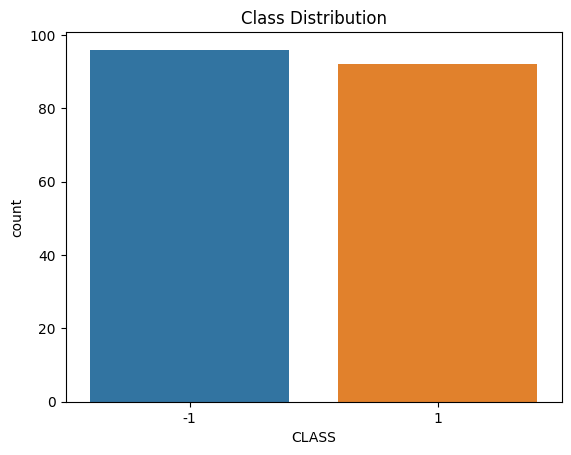

In [ ]:

sns.countplot(x='CLASS', data=news_clean)
plt.title('Class Distribution')
plt.show()


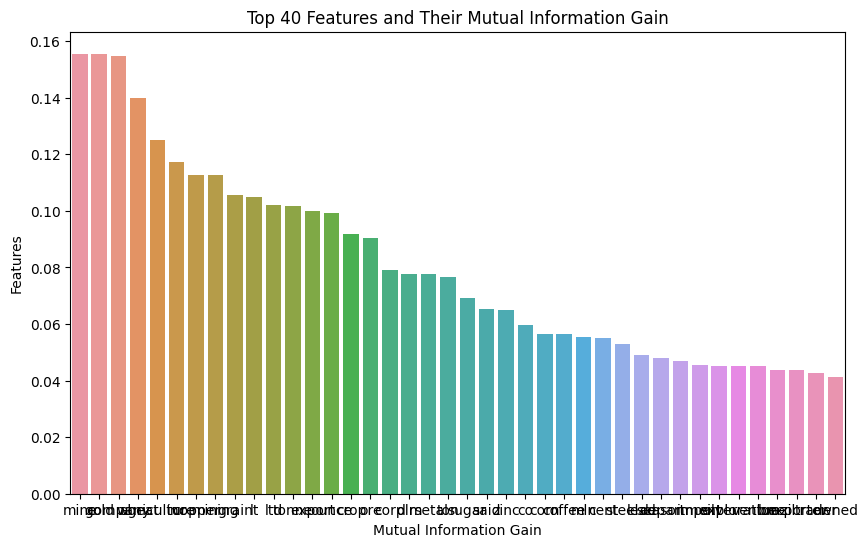

In [ ]:
top_feature_indices = sor[:40]
top_feature_values = [info_gain[i] for i in top_feature_indices]
top_feature_names = [vectorizer.get_feature_names_out()[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
sns.barplot(y=top_feature_values, x=top_feature_names)
plt.title('Top 40 Features and Their Mutual Information Gain')
plt.xlabel('Mutual Information Gain')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_top = X[:, top_feature_indices]

X_train, X_test, y_train, y_test = train_test_split(X_top, news_clean['CLASS'], test_size=0.2, random_state=42)

# Initialize classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
model = RandomForestClassifier(random_state=42)

#Random Forest
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy : {accuracy}')
print(f'Random Forest Classification Report:\n{classification_report(y_test, y_pred)}')

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Classification Report:\n{classification_report(y_test, y_pred_dt)}')

# Train and evaluate SVM
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM Classification Report:\n{classification_report(y_test, y_pred_svm)}')

# Train and evaluate KNN
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Classification Report:\n{classification_report(y_test, y_pred_knn)}')


Random Forest Accuracy : 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Decision Tree Accuracy: 0.8157894736842105
Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.76      0.82        21
           1       0.75      0.88      0.81        17

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.83      0.82      0.82        38

SVM Accuracy: 0.9736842105263158
SVM Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.95      0.98        21
           1       0.94      1.

In [ ]:
print(f'Random Forest Accuracy: {accuracy}')
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'SVM Accuracy: {accuracy_svm}')
print(f'KNN Accuracy: {accuracy_knn}')

Random Forest Accuracy: 1.0
Decision Tree Accuracy: 0.8157894736842105
SVM Accuracy: 0.9736842105263158
KNN Accuracy: 0.9210526315789473


So We get 100% Accuracy for Random Forest That Mean The top 40 features enough to predict CLASS label lets test on testing set

In [ ]:
path1 = 'testing set.txt'
column_names = [ 'TITLE', 'DATE', 'BODY']
newstest = pd.read_csv(path1, sep='\t', names=column_names)
newstest.head()

,TITLE,DATE,BODY
0,USSR WHEAT BONUS OFFER SAID STILL UNDER DEBATE,"WASHINGTON, March 6 -",The Reagan administration continues to debat...
1,HAITIAN CANE PLANTERS PROTEST SUGAR MILL CLOSURE,"PORT-AU-PRINCE, April 13 -","About 2,000 sugar cane planters marched to P..."
2,U.S. URGES JAPAN TO OPEN FARM MARKET FURTHER,"TOKYO, April 17 -",U.S. Agriculture Secretary Richard Lyng has ...
3,NORANDA COPPER MINE SHUT DOWN AFTER FIRE,"TORONTO, April 2 -",Noranda Inc said production at its Murdochvi...
4,17 MISSING NORANDA MINERS FOUND ALIVE,"MURDOCHVILLE, Que., April 2-",Seventeen miners who were missing in a coppe...


I need to clarify is test set also have value (NO TEXT) , (NO DATE)

In [ ]:
no_date_count1 = (newstest['DATE'] == '(NO DATE)').sum()
no_text_count1 = (newstest['BODY'] == '(NO TEXT)').sum()

print(f'Number of occurrences of "(NO DATE)" in the DATE column: {no_date_count1}')
print(f'Number of occurrences of "(NO TEXT)" in the BODY column: {no_text_count1}')


Number of occurrences of "(NO DATE)" in the DATE column: 4
Number of occurrences of "(NO TEXT)" in the BODY column: 4


In [ ]:
filtered_rows1 = newstest[(newstest['DATE'] == '(NO DATE)') | (newstest['BODY'] == '(NO TEXT)')]

filtered_table1 = filtered_rows1[[ 'TITLE', 'DATE', 'BODY']]
filtered_table1


,TITLE,DATE,BODY
12,USDA ESTIMATES 1986 SOVIET GRAIN CROP AT 210...,(NO DATE),(NO TEXT)
37,"GHANA COCOA PURCHASES 1,323 TONNES IN LATEST...",(NO DATE),(NO TEXT)
60,"U.S. GOLD, SILVER, PLATINUM SOAR ON VOLCKER R...",(NO DATE),(NO TEXT)
74,"U.S. EXPORT INSPECTIONS, IN THOUS BUSHELS, S...",(NO DATE),(NO TEXT)


So It like Sometime Title influance on predict CLASS

In [ ]:
def preprocess(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens= [token for token in tokens if token.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
  return' '.join(tokens)

In [ ]:
newstest['BODY2'] = newstest['BODY'].apply(preprocess)
newstest.head()

,TITLE,DATE,BODY,BODY2
0,USSR WHEAT BONUS OFFER SAID STILL UNDER DEBATE,"WASHINGTON, March 6 -",The Reagan administration continues to debat...,reagan administration continues debate whether...
1,HAITIAN CANE PLANTERS PROTEST SUGAR MILL CLOSURE,"PORT-AU-PRINCE, April 13 -","About 2,000 sugar cane planters marched to P...","2,000 sugar cane planter marched port-au-princ..."
2,U.S. URGES JAPAN TO OPEN FARM MARKET FURTHER,"TOKYO, April 17 -",U.S. Agriculture Secretary Richard Lyng has ...,u.s. agriculture secretary richard lyng asked ...
3,NORANDA COPPER MINE SHUT DOWN AFTER FIRE,"TORONTO, April 2 -",Noranda Inc said production at its Murdochvi...,"noranda inc said production murdochville , que..."
4,17 MISSING NORANDA MINERS FOUND ALIVE,"MURDOCHVILLE, Que., April 2-",Seventeen miners who were missing in a coppe...,seventeen miner missing copper mine fire found...


In [ ]:
#Use same vectorizer before used in traing set else it will create another matrics
xtest=vectorizer.transform(newstest['BODY2'])#here don,t use fit transform
print(X.shape)
print(xtest.shape)

(188, 4424)
(100, 4424)


In [ ]:
X_top_test = xtest[:, top_feature_indices]

newstest['PREDICTED CLASS'] = model.predict(X_top_test)
newstest.head(2)


,TITLE,DATE,BODY,BODY2,PREDICTED CLASS
0,USSR WHEAT BONUS OFFER SAID STILL UNDER DEBATE,"WASHINGTON, March 6 -",The Reagan administration continues to debat...,reagan administration continues debate whether...,1
1,HAITIAN CANE PLANTERS PROTEST SUGAR MILL CLOSURE,"PORT-AU-PRINCE, April 13 -","About 2,000 sugar cane planters marched to P...","2,000 sugar cane planter marched port-au-princ...",1


In [ ]:
news

,CLASS,TITLE,DATE,BODY
0,1,JAPAN FIRM PLANS TO SELL U.S. FARMLAND TO JAP...,"MORIOKA, Japan, March 12 -",A Japanese real estate company said it will ...
1,-1,NORTH BH SETS ONE-FOR-FIVE OFFER FOR NORGOLD ...,"MELBOURNE, March 12 -",North Broken Hill Holdings Ltd & lt;NBHA.ME ...
2,-1,OUTOKUMPU IN COPPER DEAL WITH IBERICA DEL COBRE,"HELSINKI, June 26 -",Finland's state-owned mining company Outokum...
3,1,ROTTERDAM GRAIN HANDLER SAYS PORT BALANCE ROSE,"ROTTERDAM, April 13 -","Graan Elevator Mij, GEM, said its balance in..."
4,1,U.S. SENATE PANEL VOTES TO LIMIT COUNTY LOAN ...,(NO DATE),(NO TEXT)
...,...,...,...,...
195,-1,CITY RESOURCES UNIT ACQUIRES PHILIPPINE MINE ...,"HONG KONG, April 21 -","& lt;City Resources (Asia) Ltd > , a locally..."
196,1,"TAIWAN TO TENDER FOR 27,000 TONNES U.S. SOYBEANS","TAIPEI, March 11 -",The joint committee of Taiwan's soybean impo...
197,-1,CAROLIN MINES & lt;CRLNF > HAS NEW ASSAY RESULTS,"Vancouver, British Columbia, March 9 -",Carolin Mines Ltd said recent assays of tail...
198,-1,TWO JAPANESE STEELMAKERS' CAPITAL SPENDING FALLS,"TOKYO, March 27 -",Kawasaki Steel Corp & lt;KAWS.T > said its p...


In [ ]:
common_dates = []

for date_train in news['DATE']:
    if date_train in newstest['DATE'].values:
        common_dates.append(date_train)

print("Common Dates:")
common_dates


Common Dates:


['(NO DATE)',
 ' LONDON, April 13 -',
 ' LONDON, April 3 -',
 ' MURDOCHVILLE, Quebec, April 3 -',
 ' BOSTON, March 6 -',
 ' LIMA, April 24 -',
 '(NO DATE)',
 ' WASHINGTON, April 9 -',
 ' WASHINGTON, March 4 -',
 ' WASHINGTON, March 4 -',
 ' WASHINGTON, Oct 19 -',
 '(NO DATE)',
 ' NEW YORK, June 2 -',
 ' WASHINGTON, April 9 -',
 ' PEKING, April 13 -',
 '(NO DATE)',
 ' LONDON, March 31 -',
 ' WASHINGTON, March 6 -',
 ' WASHINGTON, March 13 -',
 ' LONDON, April 9 -',
 '(NO DATE)',
 ' LONDON, March 13 -',
 ' WASHINGTON, April 3 -',
 ' WASHINGTON, April 9 -',
 '(NO DATE)',
 ' WASHINGTON, April 7 -',
 ' WASHINGTON, March 6 -',
 ' LIMA, April 24 -',
 ' ZURICH, April 9 -',
 ' PRETORIA, April 7 -',
 ' WASHINGTON, April 9 -',
 ' WASHINGTON, April 9 -',
 '(NO DATE)',
 '(NO DATE)',
 ' WASHINGTON, April 7 -',
 '(NO DATE)',
 ' TORONTO, March 9 -',
 ' WASHINGTON, April 3 -',
 ' LONDON, April 13 -',
 '(NO DATE)',
 ' AMSTERDAM, June 16 -',
 ' PEKING, April 13 -',
 '(NO DATE)',
 '(NO DATE)',
 ' LONDON, 

In [ ]:
result_table = pd.DataFrame(columns=['DATE', 'CLASS', 'PREDICTED CLASS'])


for index, row_test in newstest.iterrows():
    matching_rows = news[news['DATE'] == row_test['DATE']]

    for _, row_train in matching_rows.iterrows():
        result_table = result_table.append({
            'DATE': row_test['DATE'],
            'CLASS': row_train['CLASS'],
            'PREDICTED CLASS': row_test['PREDICTED CLASS']
        }, ignore_index=True)


result_table.head(2)

<ipython-input-45-54886464f2ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
<ipython-input-45-54886464f2ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
<ipython-input-45-54886464f2ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
<ipython-input-45-54886464f2ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
<ipython-input-45-54886464f2ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  re

,DATE,CLASS,PREDICTED CLASS
0,"WASHINGTON, March 6 -",1,1
1,"WASHINGTON, March 6 -",1,1


In [ ]:
from sklearn.metrics import accuracy_score

result_table['CLASS'] = pd.to_numeric(result_table['CLASS'])
result_table['PREDICTED CLASS'] = pd.to_numeric(result_table['PREDICTED CLASS'])

accuracy_test = accuracy_score(result_table['CLASS'], result_table['PREDICTED CLASS'])

print(f'Accuracy: {accuracy_test}%')



Accuracy: 0.8514851485148515%
